<a href="https://colab.research.google.com/gist/gokhaeva/5da1f47d3946a27bd12c26249daf4c80/iaa_casimedicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install krippendorff
!pip install statsmodels
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa
import krippendorff

In [ ]:
annotator1_file = '/A1_krip.csv'
annotator2_file = '/A2_krip.csv'
annotator3_file = '/A3_krip.csv'
annotator1_df = pd.read_csv(annotator1_file, delimiter=';')
annotator2_df = pd.read_csv(annotator2_file, delimiter=';')
annotator3_df = pd.read_csv(annotator3_file, delimiter=';')
argument_a1 = annotator1_df['Argument']
argument_a2 = annotator2_df['Argument']
argument_a3 = annotator3_df['Argument']

In [ ]:
# make sure that dataframes have the same format
print(annotator1_df.head())
print(annotator2_df.head())
print(annotator3_df.head())

     Case  Argument
0  101_86         2
1  101_86         2
2  102_87         1
3  102_87         2
4  103_89         2
     Case  Argument
0  101_86         2
1  101_86         2
2  102_87         1
3  102_87         2
4  103_89         2
     Case  Argument
0  101_86         2
1  101_86         2
2  102_87         1
3  102_87         2
4  103_89         2


In [ ]:
# Displays data and counts annotations for each A, verifies load accuracy and consistency.
numeric_annotator1 = annotator1_df
numeric_annotator2 = annotator2_df
numeric_annotator3 = annotator3_df
numeric_annotator1
numeric_annotator2
numeric_annotator3
len(numeric_annotator1)
len(numeric_annotator2)
len(numeric_annotator3)

355

In [ ]:
#Cohen's Kappa score
argument_a1 = annotator1_df['Argument']
argument_a2 = annotator2_df['Argument']
argument_a3 = annotator3_df['Argument']
iaa_cohen_kappa_12 = cohen_kappa_score(argument_a1, argument_a2)
iaa_cohen_kappa_23 = cohen_kappa_score(argument_a2, argument_a3)
iaa_cohen_kappa_13 = cohen_kappa_score(argument_a1, argument_a3)
print("Inter-Annotator Agreement A1|A2 (Cohen's Kappa):", iaa_cohen_kappa_12)
print("Inter-Annotator Agreement A2|A3 (Cohen's Kappa):", iaa_cohen_kappa_23)
print("Inter-Annotator Agreement A1|A3 (Cohen's Kappa):", iaa_cohen_kappa_13)


Inter-Annotator Agreement A1|A2 (Cohen's Kappa): 0.8681852671003988
Inter-Annotator Agreement A2|A3 (Cohen's Kappa): 0.3261399281108225
Inter-Annotator Agreement A1|A3 (Cohen's Kappa): 0.38583805263086757


In [ ]:
#Fleiss' Kappa
all_categories = pd.concat([annotator1_df['Argument'], annotator2_df['Argument'], annotator3_df['Argument']]).unique()
fleiss_table = pd.DataFrame(0, index=annotator1_df.index, columns=all_categories)
for category in all_categories:
    for i in annotator1_df.index:
        count = 0
        count += int(annotator1_df.loc[i, 'Argument'] == category)
        count += int(annotator2_df.loc[i, 'Argument'] == category)
        count += int(annotator3_df.loc[i, 'Argument'] == category)
        fleiss_table.loc[i, category] = count
kappa = fleiss_kappa(fleiss_table.values, method='fleiss')
print(f"Fleiss' Kappa: {kappa}")

Fleiss' Kappa: 0.49648162120677297


In [ ]:
# Krippendorff's Alpha
from krippendorff import alpha
#Concatenate the 'Argument' columns from all dataframes to create a single Series, Конвертирует данные 'Argument' в категорные
all_arguments = pd.concat([annotator1_df['Argument'], annotator2_df['Argument'], annotator3_df['Argument']], axis=0)
all_arguments_cat = pd.Categorical(all_arguments)
#Нумерация категорий
codes, uniques = pd.factorize(all_arguments_cat)
reshaped_codes = codes.reshape((3, -1))
# "nominal" for categorical data, "ordinal" for ordered, "interval" for numerical data without a true zero,
# and "ratio" for numerical with a true zero.
kripp_alpha = alpha(reliability_data=reshaped_codes, level_of_measurement="nominal")

print(f"Krippendorff's Alpha: {kripp_alpha}")

Krippendorff's Alpha: 0.49695440841690774


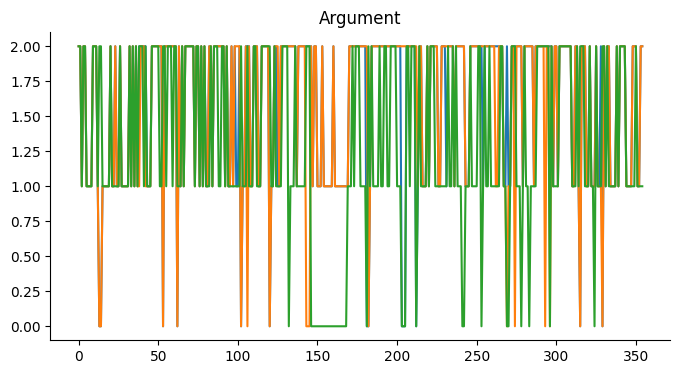

In [ ]:
from matplotlib import pyplot as plt
annotator1_df['Argument'].plot(kind='line', figsize=(8, 4), title='Argument')
plt.gca().spines[['top', 'right']].set_visible(False)
from matplotlib import pyplot as plt
annotator2_df['Argument'].plot(kind='line', figsize=(8, 4), title='Argument')
plt.gca().spines[['top', 'right']].set_visible(False)
from matplotlib import pyplot as plt
annotator3_df['Argument'].plot(kind='line', figsize=(8, 4), title='Argument')
plt.gca().spines[['top', 'right']].set_visible(False)